In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
x=iris.data

In [6]:
y=iris.target

In [7]:
print iris.DESCR


Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
iris_data=DataFrame(x,columns=['sepal length','sepal width','petal length','petal width'])

In [9]:
iris_target=DataFrame(y,columns=['species'])

In [13]:
#change categorical variables to flowers name
def flower(num):
    if num==0:
        return 'setosa'
    elif num==1:
        return 'veriscolour'
    else:
        return 'virginica'
iris_target['species']=iris_target['species'].apply(flower)

In [14]:
iris_target.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [15]:
iris=pd.concat([iris_data,iris_target],axis=1)

In [16]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


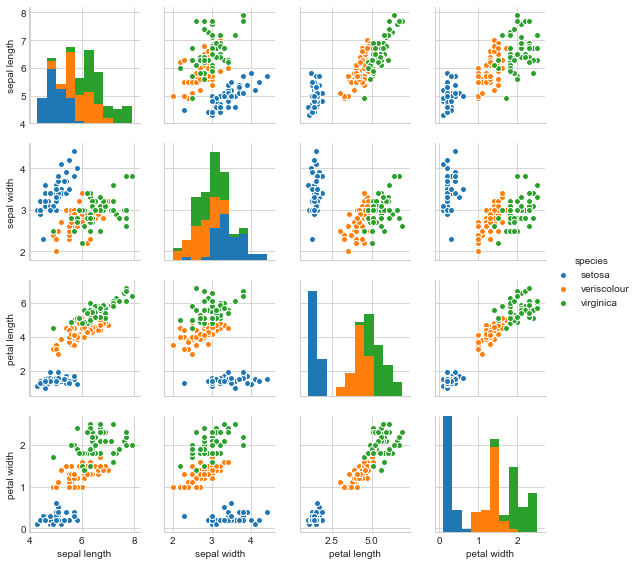

In [17]:
#pairplot of all features
sns.pairplot(iris,hue='species',size=2)

In [18]:
#group 3 varibles
#setosa has most seperated features

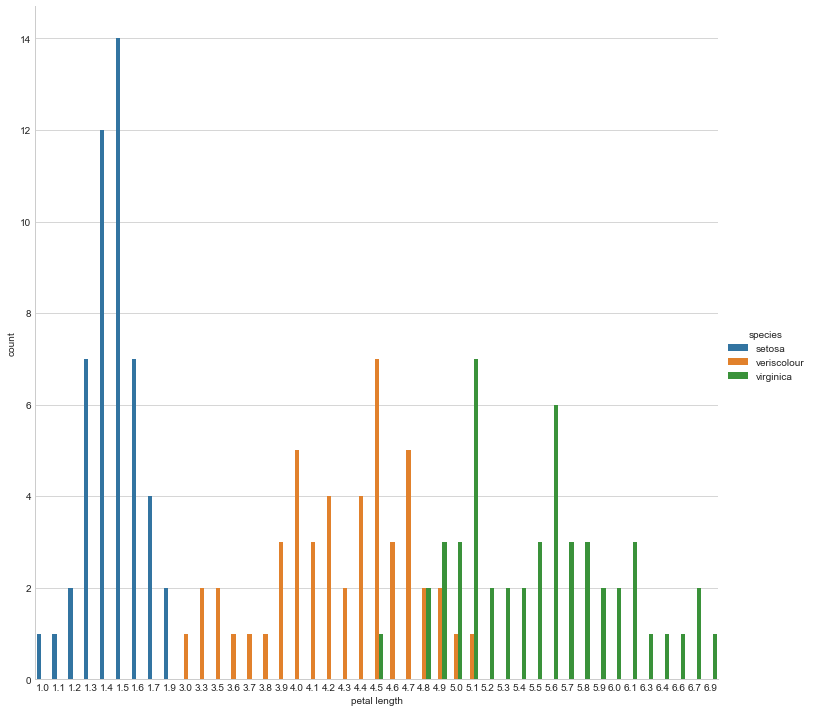

In [21]:
sns.factorplot('petal length',data=iris,hue='species',kind="count",size=10)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
logreg=LogisticRegression()

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=3)

In [24]:
#train
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
from sklearn import metrics
y_pred=logreg.predict(x_test)
print metrics.accuracy_score(y_test,y_pred)

0.9333333333333333


In [26]:
#since data is clean and well-seperated from pairplot shows, we have high accuracy

In [27]:
from sklearn.neighbors import KNeighborsClassifier
#start model with k=6
knn=KNeighborsClassifier(n_neighbors=6)

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [29]:
y_pred=knn.predict(x_test)

In [30]:
print metrics.accuracy_score(y_test,y_pred)

0.95


In [31]:
#fit with k=1
knn=KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
y_pred=knn.predict(x_test)

In [34]:
print metrics.accuracy_score(y_test,y_pred)

0.9666666666666667


In [35]:
#loop from various k values to find optimal value
k_range=range(1,21)

In [36]:
accuracy=[]

In [37]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

Text(0,0.5,'testing accuracy')

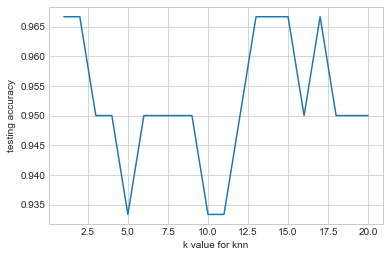

In [39]:
plt.plot(k_range,accuracy)
plt.xlabel('k value for knn')
plt.ylabel('testing accuracy')